In [7]:
%load_ext autoreload
%autoreload 2
from IPython.display import HTML
import reg_helper as RHelper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Ajuste de hyperparámetros en Machine learning

**Videos recomendados**
- Batch vs SGD: https://youtu.be/2p58rVgqsgo
- Mini-batch size: https://youtu.be/GrrO1NFxaW8 - [Interesante](https://research.fb.com/publications/accurate-large-minibatch-sgd-training-imagenet-in-1-hour/)
- Number of hidden units: https://youtu.be/IkGAIQH5wH8
- Learning rate: https://youtu.be/TwJ8aSZoh2U
- Learning rate 2: https://youtu.be/HLMjeDez7ps
- Overfitting: https://youtu.be/EeBZpb-PSac
- Overfitting 2: https://youtu.be/SVqEgaT1lXU
- Early Stopping: https://youtu.be/NnS0FJyVcDQ
- Regularization: https://youtu.be/aX_m9iyK3Ac
- Dropout: https://youtu.be/Ty6K6YiGdBs
- Dropout 2: https://youtu.be/6DcImJS8uV8
- Dropout 3: https://youtu.be/8nG8zzJMbZw
- Vanishing gradient: https://youtu.be/W_JJm_5syFw
- Other activation functions: https://youtu.be/VzGOR5SlFSw
- Local minima: https://youtu.be/gF_sW_nY-xw
- Random restart: https://youtu.be/idyBBCzXiqg
- Momentum: https://youtu.be/r-rYz_PEWC8

Muy recomendado:  
[Practical Recommendations for Gradient-Based Training of Deep
Architectures - Yoshua Bengio - 2012](https://arxiv.org/pdf/1206.5533.pdf)

**Hacer una tabla con todos los parametros e hyperparametros en el pizarron a medida que van apareciendo. Marcar:**
- Importancia
- Escala log o lineal?

Parametros  
- Pesos de interconexión entre neuronas (w)
- Bias de neuronas (b)

Hyperparametros  
- Cantidad de capas
- Cantidad de unidades por capas
- Funciones de activación
- Learning rates
- Optimizadores
- Batch-size
- Inicialización
- Momentum
- Probabilidad de dropout

# Regularización

## Overfitting en regresión lineal
<img src="images/regress_overfitting.png" alt="Drawing" style="width:70%; "/>

Los azules se usaron para entrenar y se uso una regresión polinomica de orden superior al 8

## Overfitting en clasificación
<img src="images/classif_overfitting.png" alt="Drawing" style="width:60%;"/>

## ¿Como se mide la performance de un algoritmo de aprendizaje?
- Loss function o Objective function
- Separación de train, test, cross-validation

### Train, Cross validation, test
¿Por que CV-set?
- Para datasets medianos (Entre centenas y miles): (60% ,20% ,20%)
- Para datasets grandes (Big data, 1Millon):  (98%, 1%, %)
- Cuando usar k-fold

### Regresion lineal - Función objetivo
(Media de error cuadratico)  

$J(\theta) = \frac{1}{2m}\sum{_{i=1}^m[h_\theta(x^{(i)})-y^{(i)}]^2}$

$L = \sum{_{i=1}^n[f(x_i; w)-y_i]^2}$

$L = ||\hat{y}-y_i||^2$

### Regresion logistica (Clasificacion) - Función objetivo:
(Cross-entropy)

$J(\theta) = -\frac{1}{m}[\sum{_{i=1}^my^{(i)}logh_\theta(x^{(i)}) + (1-y^{(i)})log(1-h_\theta(x^{(i)}))}]$

### Redes neuronales (Para clasificación):
$J(\theta) = -\frac{1}{m}[\sum{_{i=1}^m\sum{_{k=1}^K}y_k^{(i)}logh_\theta(x^{(i)})_k + (1-y_k^{(i)})log(1-h_\theta(x^{(i)})_k)}]$


**¿Cual es la $h_\theta(x^{(i)})$ en cada caso?**

$h_\theta(x^{(i)})_{lin} = \theta_0 + x_1^{(i)} \theta_1 + x_2^{(i)} \theta_2 + ... + x_n^{(i)} \theta_n$

$h_\theta(x^{(i)})_{log} = \sigma (h_\theta(x^{(i)})_{lin})$

**Notacion:**
- $J(\theta)$ ó $L$: Loss function, objective function, cost function
- $x^{(i)}$: Mediciones, variables independientes, features, covariates. Es un vector de dimensión $d$, cada $i$ indica una medición diferente
- $y^{(i)}$: Salida, etiqueta, label, target. La salida $i$-esima corresponde a la entrada $i$-esima
- $m$ ó $n$: Cantidad de mediciones
- $\theta$ ó $w$: Parametros a estimar. Son un total de $d+1$
- $h_{\theta}(x^{(i)})$ ó $f(x_i;w)$: Salida de mi estimador
- $K$: Cantidad de salidas de la red neuronal

## Nuestra meta
- Minimizar $J_{test}$ -> Generalizar
- Lo "mas rapido posible" sin aumentar el error

---
## Soluciones al overfitting
- Ajuste de la cantidad de parametros
- Early stop
- Inicialización de pesos
- Regularización L0, L1, L2
- Dropout (Solo para redes neuronales) [link](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)
- Batch Normalization
- Aumentar el tamaño del dataset: Buscar más datos o generarlo en forma artificial (Data augmentation)

# High Variance vs High Bias Trade-off

<img src="images/bias_variance.png" alt="Drawing" style="width:70%; "/>

Los porcentajes son error en el ejemplo de abajo y es un problema hipotetico en la detección un perro o un gato en una imagen

Fuente: Bias/Variance Trade off (Andrew NG): https://www.youtube.com/watch?v=SjQyLhQIXSM

- Train: 1%
- Dev o CV: 12%  
Como se considera?

- Train: 15%
- Dev o CV: 16%  
Como se considera?

- Train: 15%
- Dev o CV: 30%  
Como se considera? (Podria ser por regiones, en 2D no es simple de ver pero en altas dimensiones suele ser comun)

- Train: 0.5%
- Dev o CV: 1%  
Como se considera?

<img src="images/high_bias_variance.png" alt="Drawing" style="width:70%; "/>

**Como determino que es High Bias?**
- Human, Optimal (bayes error rate: https://en.wikipedia.org/wiki/Bayes_error_rate)

Discutir problema de pesos y alturas vs perros y gatos

<img src="images/pesos_alturas.png" alt="Drawing" style="width:70%; "/>

---
# Reglas generales de entrenamiento: 

1. Definir una única métrica que servirá para evaluar el modelo (Compararlo con otros modelos y determinación de buenos hiperparámetros)
2. Entender que es lo que espero de mi modelo (Que sería un buen resultado para esa métrica: Baselines con modelos sencillos y topes mirando resultados de humanos o error de bayes)
3. Entrenar modelo y mirar el Train set para ver si hay **Alto bias**
4. Si tenemos **alto bias** => Agrandar Red (Aumentar cantidad de parámtros del modelo), Entrenar mas tiempo. (Distinguir esto de que el modelo no aprende) 
5. Una vez que se logró un bias aceptable mirar performance de CV o dev para ver si hay **Alta Varianza**
6. Si **alta varianza** => Conseguir mas datos, Achicar red, Early stop, regularización?
7. Puede volver al paso 3 y sacrificar algo de bias para ganar generalización. Recomendaciones: no cambiar varios hiperparámtros al mismo tiempo. Usar algún tipo de técnica de grid search (sklearn) o optimización bayesiana (hyperopt)

Termina siendo un proceso iterativo desde los punto 3 a 7 mirando los resultados de CV y Train

Ambos parecen contradictorios y en muchos casos lo son. Pero el beneficio de la regulatización hace que pueda agrandar la red para reducir el bias sin aumentar significativamente la varianza.

---
# Analizaremos el problema con un ejemplo

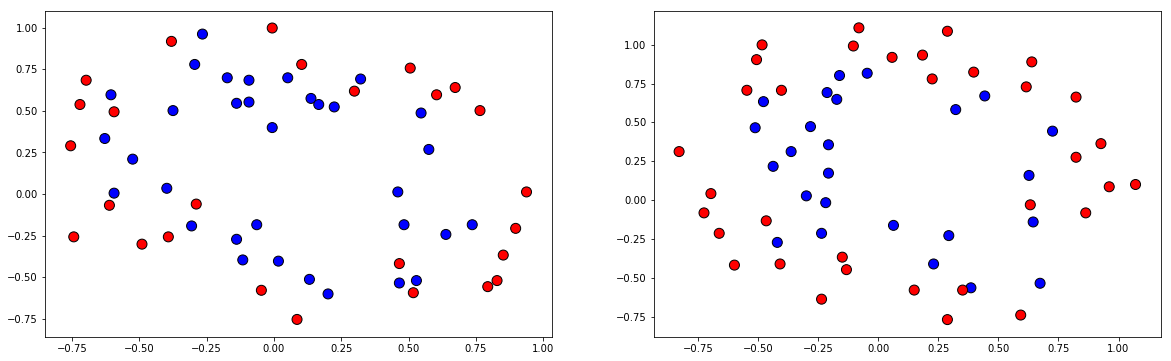

In [8]:
import numpy as np
import draw_nn
from matplotlib import pyplot as plt 
folder = 'data/'
X_train = np.load(folder+'X_train.npy')
X_test = np.load(folder+'X_test.npy')
y_train = np.load(folder+'y_train.npy') 
y_test = np.load(folder+'y_test.npy')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, ax=ax2)
plt.show()

#### ¿Por que este dataset?
- Pocas observaciones. Soluciones rápidas
- Simple para graficar en 2D. Se puede ver el resultado en el plano
- Naturalmente con un par de decenas de parametros se debería presentar overfitting